In [5]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.motifs import create, Motif
from Bio.SeqUtils import ProtParam
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import math

In [6]:
with open(r"..\ubiquitination\human\dataset\win41\human_train_pos_41.txt", 'r') as f1:
    pos_lines = f1.readlines()
    
with open(r"..\ubiquitination\human\dataset\win41\human_train_neg_41.txt", 'r') as f2:
    neg_lines = f2.readlines()

In [7]:
# 创建自定义字母表
my_alphabet = IUPAC.IUPACProtein.letters + "X"

In [8]:
pos_seqs = create([Seq(line.strip(),alphabet=my_alphabet) for line in pos_lines])
neg_seqs = create([Seq(line.strip(),alphabet=my_alphabet) for line in neg_lines])

In [9]:
pos_seqs_counts = pos_seqs.counts
neg_seqs_counts = neg_seqs.counts

In [10]:
pos_counts_df = pd.DataFrame(pos_seqs_counts)
neg_counts_df = pd.DataFrame(neg_seqs_counts)

In [11]:
p_list = []
chi2_list = []
position_num = pos_counts_df.shape[0]
for i in range(position_num):
    if i != 20:
        mat = np.zeros((2,20))
        mat[0,:] = pos_counts_df.iloc[i,:20]
        mat[1,:] = neg_counts_df.iloc[i,:20]
#         for m in range(2):
#             for mm in range(len(mat[m])):
#                 if mat[m,mm] == 0:
#                     mat[m,mm] = 1
        chi2, p_value, dof, expected_freq = chi2_contingency(mat)
        p_list.append(p_value)
        chi2_list.append(chi2)
    else:
        p_list.append(np.nan)
        chi2_list.append(np.nan)

In [12]:
-np.log10(0.01)

2.0

In [13]:
p_list

[0.4747213769093859,
 0.09239825852511963,
 0.6867814959297964,
 0.10354613101677004,
 3.095533643636512e-05,
 0.2044585842900763,
 0.0012583217001726024,
 0.002122738923911856,
 0.001723647407904419,
 0.008092382525098037,
 0.01041622398280126,
 0.0007617348957320207,
 2.3328482774778427e-06,
 9.023121820128919e-05,
 8.820488056426015e-08,
 0.0005947467726537957,
 6.218620554244955e-07,
 1.1311625325781799e-14,
 4.426238078314899e-58,
 5.782933868310781e-53,
 nan,
 7.476204108670027e-76,
 2.9371733876678675e-97,
 4.538017687656005e-18,
 8.3174526309973e-13,
 2.9936484610903383e-09,
 0.0003595670006285412,
 4.7917453050284685e-06,
 0.03314593446220037,
 0.009088824303186006,
 0.000501243134263946,
 0.009261373262963831,
 0.014997745084681501,
 0.15524657456289298,
 0.0017764949672208984,
 0.16651059834069837,
 0.03958120730965298,
 0.7866213187075289,
 0.48948265792424994,
 0.0015573886071755692,
 0.038785357053215494]

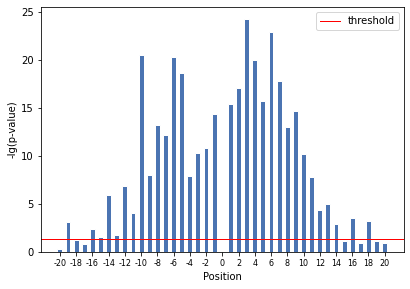

In [20]:
width = 0.6
cell = [i for i in range(-20, 21)]
index = np.arange(41)
threshold = -np.log10(0.05)

plt.figure(figsize=(6.5, 4.5))

#plt.plot(p1, p2, color='#DB3124', label='-log(p-value) = -log(0.05)')
plt.bar(index, -np.log10(p_list), width, color="#4B74B2", edgecolor='white')

plt.axhline(y=threshold, color='r', linestyle='-', label='threshold', linewidth=1)

plt.xlabel('Position')
plt.ylabel('-lg(p-value)')

n = 2
plt.xticks(index[::n], cell[::n], fontsize=8)

plt.legend()

plt.savefig('Fig chi2-arab.pdf', format='pdf', dpi=1200)
plt.show()

In [13]:
with open(r"..\ubiquitination\dataset\win41\independent_test_set\test_pos_win41.txt", 'r') as f1:
    pos_lines = f1.readlines()
    
with open(r"..\ubiquitination\dataset\win41\independent_test_set\test_neg_win41.txt", 'r') as f2:
    neg_lines = f2.readlines()

In [16]:
pos_win31 = [line[4:-6-1] for line in pos_lines]
neg_win31 = [line[4:-6-1] for line in neg_lines]

In [17]:
pos_win31

['LNQLKKEFKRVSSADAKPSSREELMESGMAD',
 'LPFKEIIEALLRNSGEKLNERDDKVSYVEIL',
 'DQQQQQKQRPRMQPKSKDVVEETPEDLMLRF',
 'XXXXXXXXMEIATDTAKQMRDEELFKAAEWG',
 'SPKSGSSPVSLKDQLRKKTYEGSDSGSGSQR',
 'QEQRNSSQDHLLAQESKAEGRKRQELQIMVP',
 'GYDLSSAVDSKVPARGKALIPTDLSIAVPEG',
 'XXXXXXXMACVNEPSPKLQKLDRNGIHGDSS',
 'KGNQEEEDYGEEDFNSKREGPSSNTTVHSNR',
 'NERFQILRELIPNSEQKRDTASFLLEVIDYV',
 'ARFDDVQRAPRLPTKGKREAKELDESKSKKG',
 'SQPLLTSLRQEVKRFAKNPEEIRKLGKLALK',
 'CLGSMDDIKKVFQRFDKNGDGKISVDELKEV',
 'RPDLKKAALARLSAISKGLRVAKSGAKQRNR',
 'KNKWEKSSWGRKLIVQKRRAALNDFDRFKIM',
 'SVDQWNTLRNHAEDIEKALSDLSXXXXXXXX',
 'GEKLREQVEERLEFYDKGVAPRKNVDVMKEV',
 'KMMGSTPMDLARSNLAKSGQISRNALCPCGS',
 'SKDSGGQFSKALNRFQKEDPTFRVGLDPESG',
 'AAVEQLKSIREDIVSGKANFEEVATRVSDCS',
 'SKAVTEREREASQVSSKTKSESSFGQSASRS',
 'DTDSEEELKEAFRVFDKDQNGFISAAELRHV',
 'NTAIIDQILKLRLEKAKLLGYRNYAEVSMAT',
 'SENNGSRSDSESITAPKADSTVVEPRKIALI',
 'SLDYARTRLANDAKAAKKGGGGRQFDGLVDV',
 'SDRSSHDKYSNSGHRVKSNEKGEDLSSGRRH',
 'KEKEVHVKSSRDRSDGKCLATEDRDTHSKKL',
 'SPAAERRVCLSSIRSPKMGNPRREEK

In [18]:
f1 = open('D:/study/paper/ubiquitination/dataset/win31/'+'test_pos_win'+str(31)+".txt","w")
for pp in pos_win31:
    f1.write(pp+'\n')
f1.close()

f2 = open('D:/study/paper/ubiquitination/dataset/win31/'+'test_neg_win'+str(31)+".txt","w")
for nn in neg_win31:
    f2.write(nn+'\n')
f2.close()